# Pandas Introduction - DataFrames
Pandas is widely used in machine learning because of its ablility to present and organise data in tabular format known as DataFrames. 

In [1]:
import pandas as pd #commonly imported as pd
import numpy as np
from numpy.random import randint

from jupyterthemes import jtplot
jtplot.style()

## How to Create a DataFrame
We will start off by creating a simple 5 by 4 DataFrame.

In [2]:
index= ['A', 'B', 'C', 'D', 'E'] # row labels
columns= ['W', 'X', 'Y', 'Z'] # column labels

In [3]:
np.random.seed(42) #for reproducibility
data = randint(-100,100,(5,4))
data

array([[  2,  79,  -8, -86],
       [  6, -29,  88, -80],
       [  2,  21, -26, -13],
       [ 16,  -1,   3,  51],
       [ 30,  49, -48, -99]])

In [4]:
df = pd.DataFrame(data,index,columns) #puts our data into a DataFrame
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


## Working with Columns
We can perform operations on columns of interest from existing DataFrames

In [5]:
df['W'] #Grabs column titled 'W'

A     2
B     6
C     2
D    16
E    30
Name: W, dtype: int32

In [6]:
df[['W','Z']] #grabs the indicated columns. Notice the parameters are indexed in a list unlike above

,W,Z
A,2,-86
B,6,-80
C,2,-13
D,16,51
E,30,-99


In [7]:
df['new'] = df['W'] + df['Y'] #add a new column
df

,W,X,Y,Z,new
A,2,79,-8,-86,-6
B,6,-29,88,-80,94
C,2,21,-26,-13,-24
D,16,-1,3,51,19
E,30,49,-48,-99,-18


In [8]:
df = df.drop('new',axis=1)#removes the indicated column. axis=1 to specify columns instead of rows
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


## Working with Rows
We can perform operations on rows of interest from existing DataFrames

In [9]:
df.loc['A'] #selects row by name. Notice .loc is used for rows, but not for columns

W     2
X    79
Y    -8
Z   -86
Name: A, dtype: int32

In [10]:
df.loc[['A','C']]

,W,X,Y,Z
A,2,79,-8,-86
C,2,21,-26,-13


In [11]:
df.iloc[0] #selects row of interest by index location

W     2
X    79
Y    -8
Z   -86
Name: A, dtype: int32

In [12]:
df.iloc[0:2] #selects multiple rows by index

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80


In [13]:
df.drop('C',axis=0)#removes row titled 'C'. axis=0 to specify for rows instead of columns

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
D,16,-1,3,51
E,30,49,-48,-99


## Selecting a Subset of Rows and Columns

In [14]:
df.loc[['A','C'],['W','Y']] #select a subset from dataset
#rows and columns are specified in 1st and 2nd lists respectively

,W,Y
A,2,-8
C,2,-26


## Conditional Selection
Parts of a dataframe can be selected based on given condition

In [15]:
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


In [16]:
df>0 #returns true/false at locations where the values are greater than zero

,W,X,Y,Z
A,True,True,False,False
B,True,False,True,False
C,True,True,False,False
D,True,False,True,True
E,True,True,False,False


In [17]:
df[df['X']>0] #removes rows where 'X' column < 0

,W,X,Y,Z
A,2,79,-8,-86
C,2,21,-26,-13
E,30,49,-48,-99


In [18]:
df[(df['W']>0) & (df['Y'] > 1)]#can use multiple conditions as well.

,W,X,Y,Z
B,6,-29,88,-80
D,16,-1,3,51


## DataFrame Summary
We can obtain a statistical summary for our dataframes e.g. mean and deviation

In [19]:
df.describe()

,W,X,Y,Z
count,5.00000,5.000000,5.000000,5.000000
mean,11.20000,23.800000,1.800000,-45.400000
std,11.96662,42.109381,51.915316,63.366395
min,2.00000,-29.000000,-48.000000,-99.000000
25%,2.00000,-1.000000,-26.000000,-86.000000
50%,6.00000,21.000000,-8.000000,-80.000000
75%,16.00000,49.000000,3.000000,-13.000000
max,30.00000,79.000000,88.000000,51.000000


## Reading CSV Files

In [20]:
df = pd.read_csv('example.csv')

In [21]:
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


# Data Visualization

## Matplotlib

In [22]:
import matplotlib.pyplot as plt

In [23]:
x = [0,1,2] #x data
y = [100,200,300] # y data

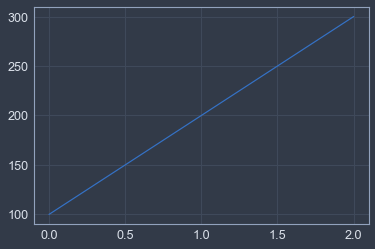

In [24]:
plt.plot(x,y)

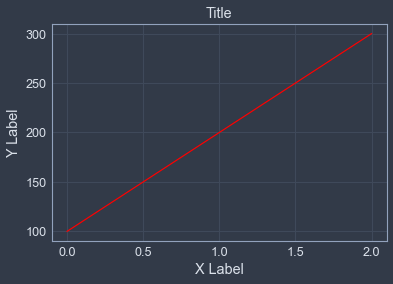

In [25]:
plt.plot(x,y, color='red') #specify labels and colors
plt.title('Title')
plt.xlabel('X Label')
plt.ylabel('Y Label');

## Seaborn

In [26]:
import seaborn as sns

In [27]:
df = pd.read_csv('heart.csv')

## The Data

Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Columns
* age  age in years
* sex  (1 = male; 0 = female)
* cp  chest pain type
* trestbps   resting blood pressure (in mm Hg on admission to the hospital)
* cholserum   cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg   resting electrocardiographic results
* thalach   maximum heart rate achieved
* exang    exercise induced angina (1 = yes; 0 = no)
* oldpeak   ST depression induced by exercise relative to rest
* slope    the slope of the peak exercise ST segment
* ca    number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target   1 or 0

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\kevin\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

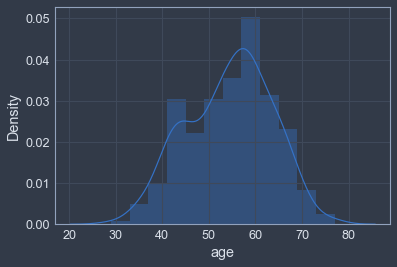

In [29]:
sns.distplot(df['age'])  #Distribution plot

C:\Users\kevin\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

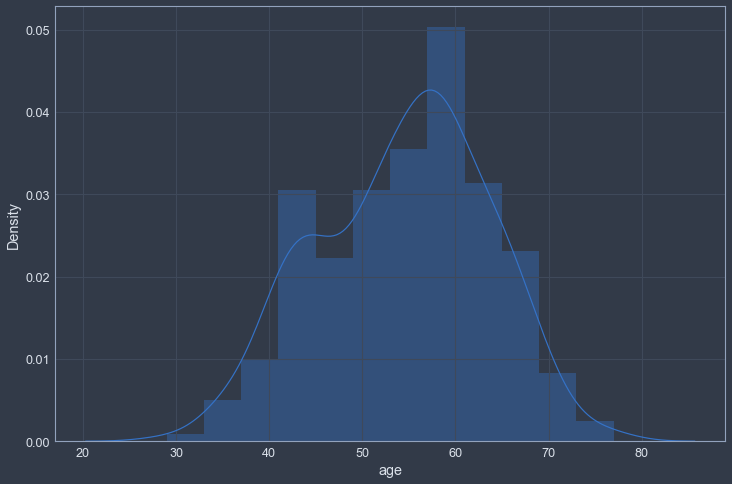

In [30]:
plt.figure(figsize=(12, 8))  #Resize
sns.distplot(df['age'])

C:\Users\kevin\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

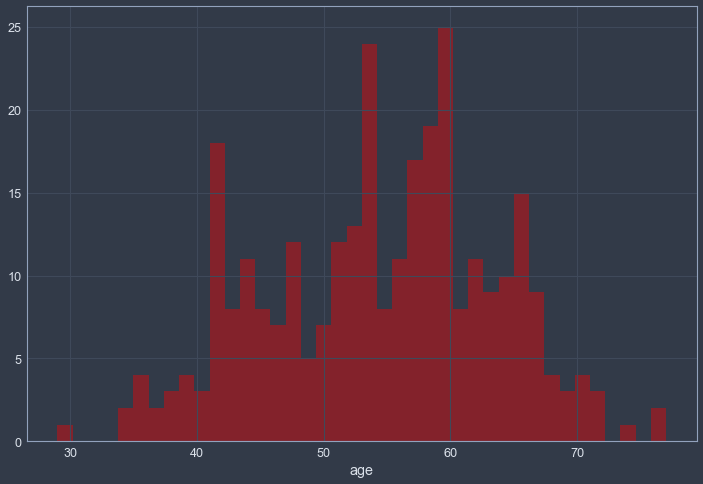

In [31]:
plt.figure(figsize=(12, 8))
sns.distplot(df['age'],kde=False,bins=40,color='red') #change bins and color. KDE is dist line

<AxesSubplot:xlabel='sex', ylabel='count'>

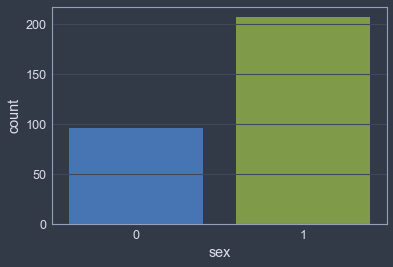

In [32]:
sns.countplot(x='sex',data=df) #countplot

In [33]:
df.head() #Scatterplot

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='chol', ylabel='trestbps'>

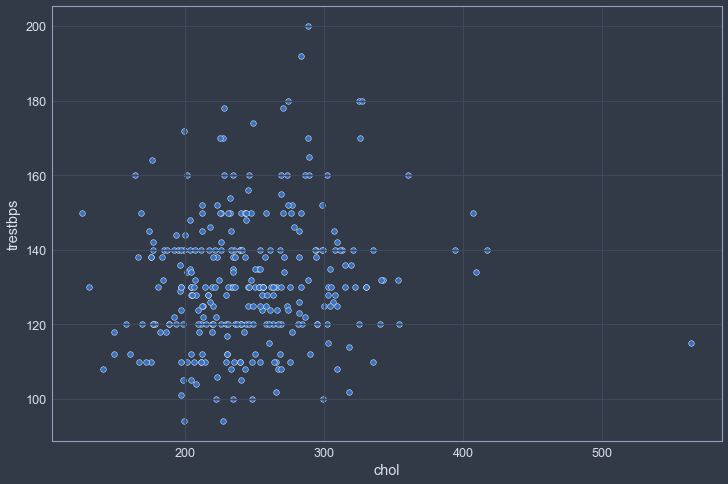

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='chol',y='trestbps',data=df)

<AxesSubplot:xlabel='chol', ylabel='trestbps'>

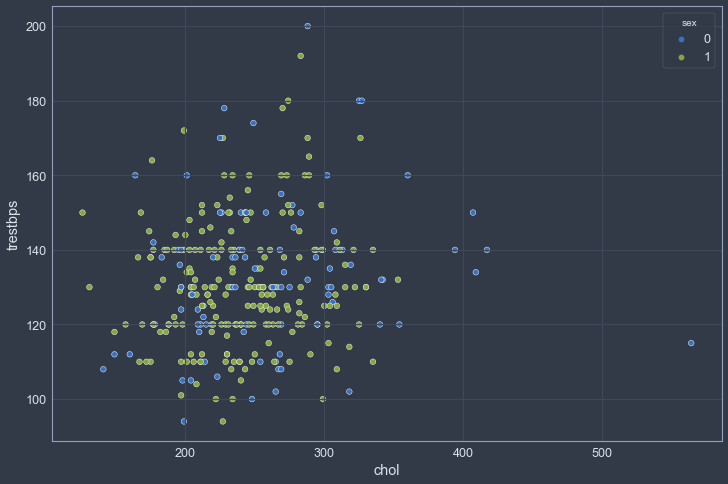

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='chol',y='trestbps',data=df,hue='sex')

<AxesSubplot:xlabel='chol', ylabel='trestbps'>

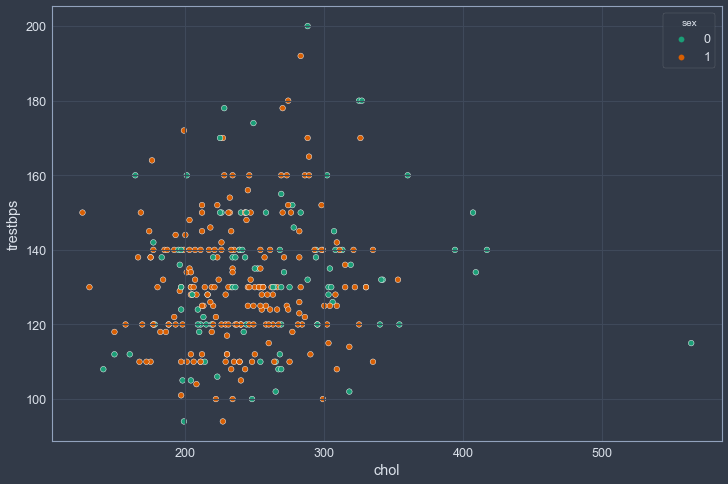

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='chol',y='trestbps',data=df,hue='sex',palette='Dark2')

## Pairplot: Histograms & Scatterplots for every column!

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
iris = pd.read_csv('iris.csv')

In [39]:
iris.head() #Pairplot

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


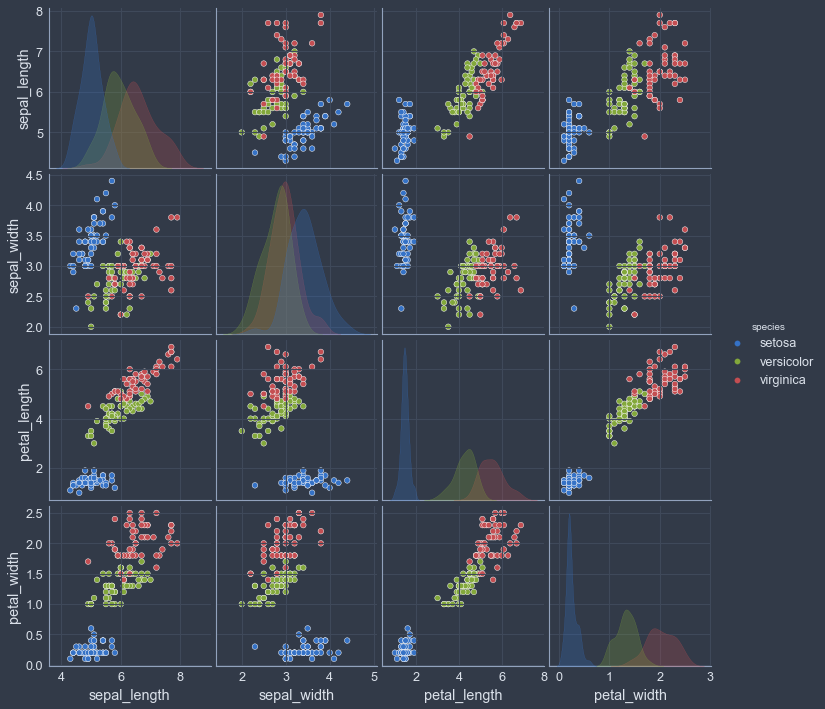

In [40]:
sns.pairplot(iris, hue = "species")

## Source
www.pieriandata.com